<a href="https://colab.research.google.com/github/arora123/Statistics-for-Data-Science-using-Python/blob/main/Data_Cleaning_2_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning for 'Titanic' Data

Importing data & exploring

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/OTS_Data/train.csv')
test = pd.read_csv('/content/drive/My Drive/OTS_Data/test.csv')

print('Shape of training data is ', train.shape, '\n')

print('Shape of testing data is ', test.shape)


Shape of training data is  (891, 12) 

Shape of testing data is  (418, 11)


In [ ]:
print(train.columns)

print(test.columns)
# 'Survived' column is not there in test data set

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print(train.info())
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
import numpy as np
# Let's create a new column named 'Survived' in  test data
test['Survived'] = np.nan

test.shape

(418, 12)

In [ ]:
# create columns named 'data' in both data sets which indicates wether the data is from train or test set
train['data'] = 'train'
test['data'] = 'test'
print(train.shape)
print(test.columns)
test.head()

(891, 13)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'data'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,test


In [ ]:
# let's combine train & test data set for preprocessing

all = pd.concat([train, test])
all.shape
print(all.head())
all.tail()

   PassengerId  Survived  Pclass  ... Cabin Embarked   data
0            1       0.0       3  ...   NaN        S  train
1            2       1.0       1  ...   C85        C  train
2            3       1.0       3  ...   NaN        S  train
3            4       1.0       1  ...  C123        S  train
4            5       0.0       3  ...   NaN        S  train

[5 rows x 13 columns]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [ ]:
# Missing values
all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [ ]:
all["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


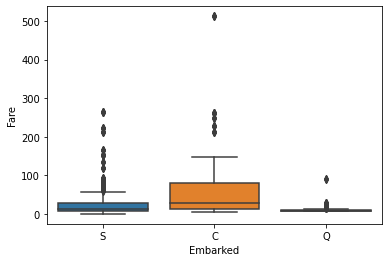

In [ ]:
import seaborn as sns
sns.boxplot(x = 'Embarked', y='Fare', data=all)
# we don't see any visible association between these two variables

# we decide to fill missing values in this column by most frequent category

In [ ]:
all['Embarked'] = all['Embarked'].fillna('S')
all['Embarked'].isnull().sum()
all['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

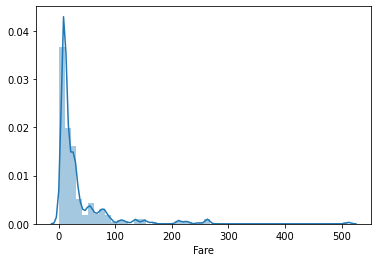

In [ ]:
sns.distplot(all['Fare'])
# right skewed, lot of variation, can not use mean imputation
# We can use median imputation

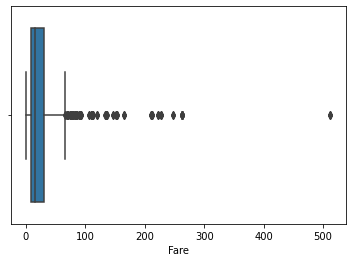

In [ ]:
sns.boxplot(all['Fare'])

# Explore 'Fare' variable

1. look at distribution
2. look at numerical summary
3. looks at the related variables

*   Pclass
*   Age



In [ ]:
all["Fare"].describe()


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

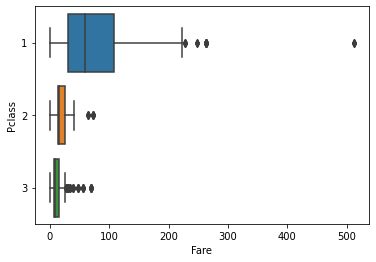

In [ ]:
sns.boxplot(x='Fare', y=all['Pclass'].astype('category') , data=all)

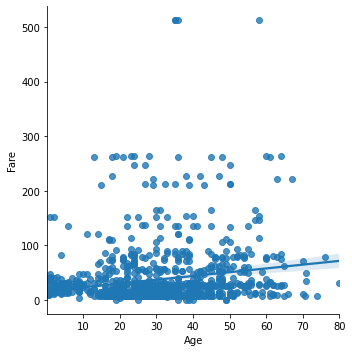

In [ ]:
sns.relplot(x = 'Age', y= 'Fare', data=all)

Fare is not related with embarked or age column. but it's related with Pclass

fare is right skewed, we will do median imputation


In [ ]:
all[all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


In [ ]:
all[all['Fare'].isnull()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [ ]:
all['Fare'].groupby(all['Pclass']).median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [ ]:
med = all[all['Pclass'] == 3]['Fare'].median()
med

8.05

In [ ]:
all['Fare'] = all['Fare'].fillna(med)
all['Fare'].isnull().sum()

0

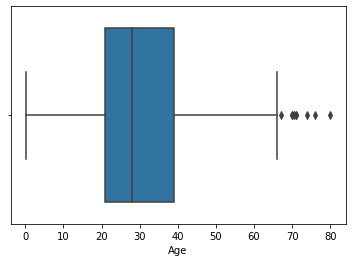

In [ ]:
sns.boxplot(all['Age'])

## Steps to cobine train & test datasets for preprocessing

We are doing it just for exploratory purpose.
Ideally data exploration should be done only on training data & preprocessing should be handled by using scikit-learn pipelines.

In [ ]:
import numpy as np
test['Survived'] = np.nan

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived       418
dtype: int64

In [ ]:
train['data'] = 'train'
test['data'] = 'test'
print(train)
print(test)

     PassengerId  Survived  Pclass  ... Cabin Embarked   data
0              1         0       3  ...   NaN        S  train
1              2         1       1  ...   C85        C  train
2              3         1       3  ...   NaN        S  train
3              4         1       1  ...  C123        S  train
4              5         0       3  ...   NaN        S  train
..           ...       ...     ...  ...   ...      ...    ...
886          887         0       2  ...   NaN        S  train
887          888         1       1  ...   B42        S  train
888          889         0       3  ...   NaN        S  train
889          890         1       1  ...  C148        C  train
890          891         0       3  ...   NaN        Q  train

[891 rows x 13 columns]
     PassengerId  Pclass  ... Survived  data
0            892       3  ...      NaN  test
1            893       3  ...      NaN  test
2            894       2  ...      NaN  test
3            895       3  ...      NaN  test
4     

In [ ]:
# Joining train & test data sets for preprocessing purpose [we use rbind() in R]

all = pd.concat([train, test])
all.shape

(1309, 13)

# Analysing for missing values

In [ ]:
# To check if there's any missing value in each column of data frame
# all.isnull().any()

# To check if there's any missing value in each row of data frame
# all.isnull().any(axis=1)

# Number of missing values in each column
all.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

1. Survived is our response variable, missing only for test data as expected

2. Too many missing values in 'Age', need imputation as it can be an important predictor

3. One missing value in fare, needs imputation as it can be an important predictor

4. Cabin have many missing values [more than 77%] and not a predictor, we will drop it from the data

5. two missing values in embarked, we will impute, however, it might not be an important predictor


In [ ]:
all.drop(['Cabin'], axis=1, inplace=True)
# alternate way
del all['Cabin']

In [ ]:
all.nunique() # no of unique values in each column

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Embarked          3
data              2
dtype: int64

In [ ]:
# To see the rows which have missing value in any [at least one] column
all[all.isna().any(axis=1)]

# all.loc[all.isna().any(axis=1),: ]

# Not nay useful information

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,data
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,train
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,train
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,train
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,train
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,train
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,test


# Let's first explore embarked variable

*   It is a categorical variable



In [ ]:
#frequency table
all['Embarked'].value_counts()
# most frequent value is 'S', so we can replace missing values as 'S

# To see frequency table that includes Nan (missing values)
all['Embarked'].value_counts(dropna=False)


S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

In [ ]:
all['Embarked'] = all['Embarked'].fillna('S')

print(all['Embarked'].value_counts(), '\n')

print('missing values in this column ', all['Embarked'].isnull().sum())

S    916
C    270
Q    123
Name: Embarked, dtype: int64 

missing values in this column  0


# Now let's explore fare column


*   It's a numerical column
*   Summary/distributions/plots
*   It's relationship with other variables



In [ ]:
# How many missing values?
all['Fare'].isnull().sum() 

1

In [ ]:
# numerical summary/distribution

all['Fare'].describe()

# Too much variation
# right skewed
# mean is not a reliable measure

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

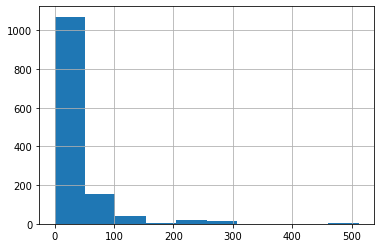

In [ ]:
# plots
all['Fare'].hist()
# right skewed

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1070.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

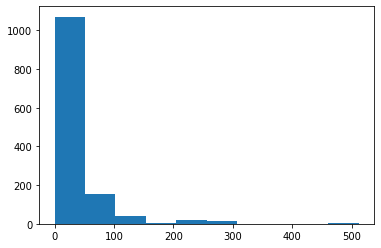

In [ ]:
# Using matplotlib
import matplotlib.pyplot as plt
plt.hist(all['Fare'])


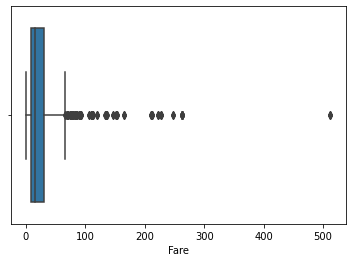

In [ ]:
# import seaborn as sns
# sns.distplot(all.Fare)

sns.boxplot("Fare", data=all)


# Possible relationship with other predictors


*   Pclass
*   Age
*   Embarked

Let's explore




In [ ]:
pd.crosstab(all['Embarked'], all['Fare'])
# Not easy to read for numerical variable
# Plots are better

Fare,0.0000,3.1708,4.0125,5.0000,6.2375,6.4375,6.4500,6.4958,6.7500,6.8583,6.9500,6.9750,7.0000,7.0458,7.0500,7.0542,7.1250,7.1417,7.2250,7.2292,7.2500,7.2833,7.3125,7.4958,7.5208,7.5500,7.5750,7.5792,7.6292,7.6500,7.7208,7.7250,7.7292,7.7333,7.7375,7.7417,7.7500,7.7750,7.7792,7.7875,...,76.2917,76.7292,77.2875,77.9583,78.2667,78.8500,79.2000,79.6500,80.0000,81.8583,82.1708,82.2667,83.1583,83.4750,86.5000,89.1042,90.0000,91.0792,93.5000,106.4250,108.9000,110.8833,113.2750,120.0000,133.6500,134.5000,135.6333,136.7792,146.5208,151.5500,153.4625,164.8667,211.3375,211.5000,221.7792,227.5250,247.5208,262.3750,263.0000,512.3292
Embarked,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,21,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,0,0,2,0,6,0,0,0,2,0,6,0,0,2,0,2,0,3,3,4,3,0,0,5,3,2,3,0,0,0,0,5,0,5,3,7,0,4
Q,0,0,0,0,0,0,0,0,2,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,1,2,1,7,2,1,50,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
S,17,1,0,1,1,0,1,3,0,0,0,2,2,1,9,2,4,1,0,0,17,0,1,3,1,8,1,1,0,6,0,0,0,0,0,0,5,26,0,0,...,0,0,2,3,0,3,0,3,2,3,0,2,0,2,3,0,2,0,4,0,0,0,0,4,2,0,1,0,0,6,3,4,4,0,4,0,0,0,6,0


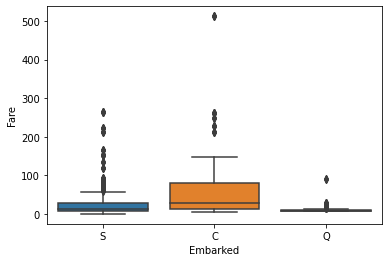

In [ ]:
# import seaborn as sns

sns.boxplot(x = 'Embarked', y = 'Fare', data=all)

# Not much association

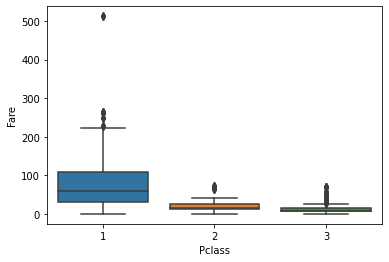

In [ ]:
sns.boxplot(x = 'Pclass', y='Fare', data=all)

# Clear indication of Fare decreasing with going from classs 1 to class 3 [as expected]

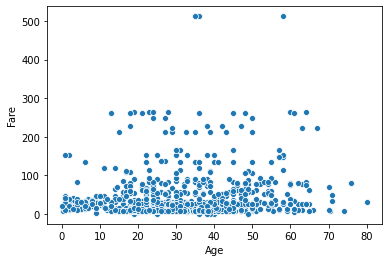

In [ ]:
sns.scatterplot(x='Age', y='Fare', data=all)

# Almost no relation with 'Age'



1.   Let's explore Pclass for observation with missing Fare
2.   Replace with median value for that group



In [ ]:
all[all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,data
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,test


In [ ]:
all[all['Fare'].isnull()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [ ]:
# Median of 'Fare' for all groups of 'Pclass' 

all['Fare'].median()

14.4542

In [ ]:
# Median of 'Fare' for all groups of 'Pclass' 

all['Fare'].groupby(all['Pclass']).median()



Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [ ]:
# Median Fare for Pclass==3

med = all[all['Pclass']==3]['Fare'].median()
med

8.05

## Replacing missing value

In [ ]:
all['Fare'].fillna(med, inplace=True)
all['Fare'].isnull().sum()

0

## Mean imputation of 'Age'

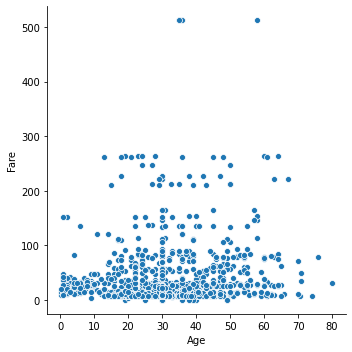

In [ ]:
sns.relplot('Age', 'Fare', data=all) # No relation as explored earlier too

In [ ]:
all['Age'].fillna(all['Age'].mean(), inplace=True)

all['Age'].isnull().sum()

0

In [ ]:
all['Age'].describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

**Note: We can explore 'Name' column to find out titles & their association with 'Age' It will help us better imputation of missing values in 'Age' column**